In [25]:
import pandas as pd
import sqlite3

In [26]:
con = sqlite3.connect("../data/Checking_Logs.sqlite")

In [27]:
views = pd.read_sql("SELECT datetime FROM pageviews WHERE uid LIKE 'user_%'", con, parse_dates=['datetime'])
views = views.groupby(by=[views['datetime'].dt.date]).count()
views.rename(columns={'datetime': 'views'}, inplace=True)
views.head()

,views
datetime,
2020-04-17,1
2020-04-18,23
2020-04-19,15
2020-04-21,3
2020-04-22,1


In [28]:
commits = pd.read_sql("SELECT timestamp as datetime FROM checker WHERE uid LIKE 'user_%'", con, parse_dates=['datetime'])
commits = commits.groupby(by=[commits['datetime'].dt.date]).count()
commits.rename(columns={'datetime': 'commits'}, inplace=True)
commits.head()

,commits
datetime,
2020-04-17,23
2020-04-18,69
2020-04-19,33
2020-04-20,25
2020-04-21,25


In [29]:
stat = views.join(commits, on='datetime', how='inner')
stat.head()

,views,commits
datetime,,
2020-04-17,1,23
2020-04-18,23,69
2020-04-19,15,33
2020-04-21,3,25
2020-04-22,1,28


<Axes: title={'center': 'Views and commits per day'}, xlabel='datetime'>

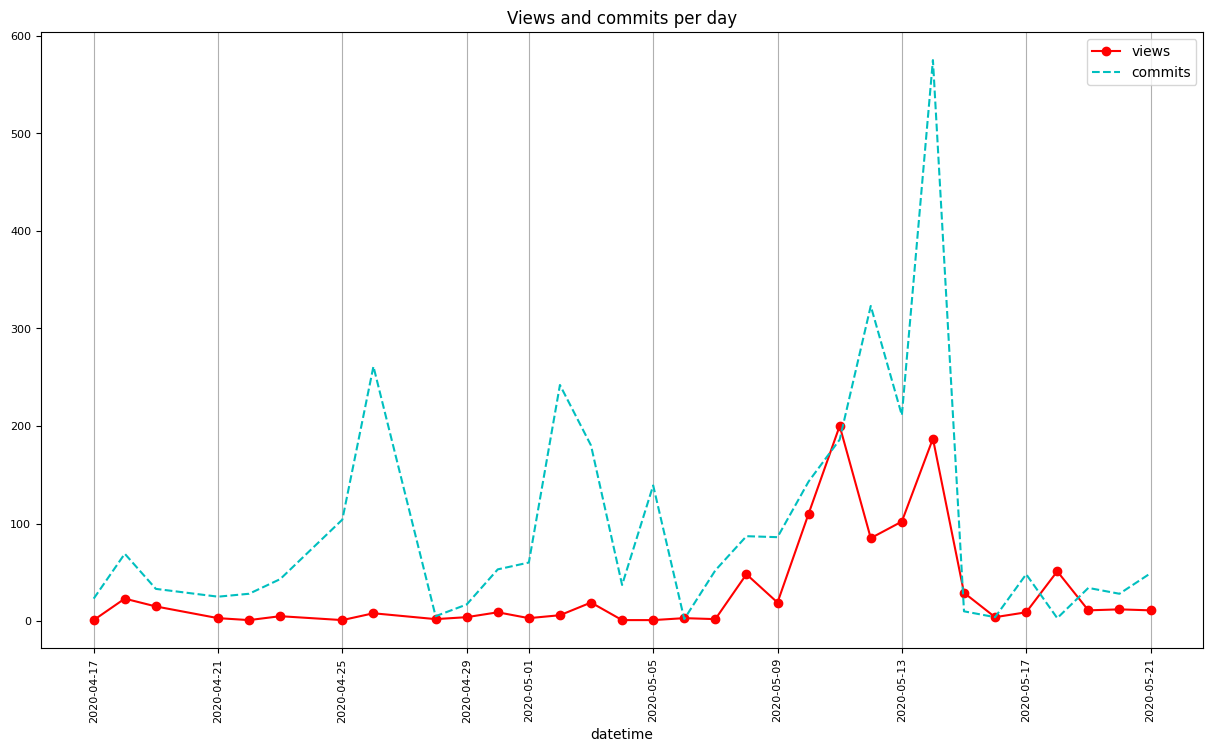

In [31]:
plt = stat.plot(
    figsize=(15, 8),
    fontsize=8,
    title='Views and commits per day',
    rot=90,
    style={'views': 'r.-',
           'commits': 'c--'},
    markersize=12)
plt.grid(axis='x')
plt

## How many times was the number of views larger than 150?
- The answer is 2

In [32]:
con.close()